<a href="https://colab.research.google.com/github/jmgang/SpoTwofyStreamlitApp/blob/main/notebooks/5b_D7N2_Create_Recommender_Engine_ExpandedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Recommender Engine

*What is a recommender engine?*

A recommender engine is an information filtering system that predicts a user's preferences for a set of items (such as products, movies, or music) based on their previous interactions with those items or similar items, and provides personalized recommendations for new items.

This recommender engine takes in a *seed track* and outputs track recommendations based on *similarity measures*

In [11]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity

In [12]:
# Mount GDrive folders
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Set home directory
import os
home_dir = "/content/drive/MyDrive/Colab Notebooks/Sprint 3/"
os.chdir(home_dir)

## 1. Read the recommendation pool

In [14]:
# read data
rec_pool_df = pd.read_csv("data/spotify_tracks_hale_expanded_ml_rec_pool.csv")
rec_pool_df

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,genre,duration_ms,num_artists,duration_mins,predicted_genre_id,predicted_genre,predicted_genre_proba,genre_alternative_rock_proba,genre_pop_proba,genre_sad_opm_proba
0,3OpGUlDmRUXh0NkIYWoIlD,Your Song,2XHTklRsNMOOQT56Zm3WS4,Parokya Ni Edgar,0kV35wyXIJKk04VRG0DdF4,168493.0,2003,70,0.636,0.159,...,opm,NaN,NaN,NaN,2,sad_opm,0.612115,0.156513,0.231372,0.612115
1,761frfZtZ8I2g70UsjFfBK,I Need You More Today,3XEHRbR9NMWfNzQ6TQMS9M,Caleb Santos,4TyVEjoScAou6qVjhXyYfp,233728.0,2016-12-02,63,0.474,0.522,...,opm,NaN,NaN,NaN,2,sad_opm,0.654385,0.125069,0.220546,0.654385
2,4r3wYgrJ3Q30ldSk05e6KP,Kiss (Never Let Me Go),0001ZVMPt41Vwzt1zsmuzp,Thyro & Yumi,0tSrGWDVpvBzlD8OWSRmg6,259714.0,2020-04-17,11,0.571,0.534,...,opm,NaN,NaN,NaN,1,pop,0.518463,0.207131,0.518463,0.274406
3,3VcVQmMivq2ISfKUmIuvMK,Rainbow,6ZgBJRjJsK1iOJGKGZxEUv,South Border,6bMej3xtNOTiiHLdhR4wzX,347120.0,2005-01-01,63,0.660,0.224,...,opm,NaN,NaN,NaN,2,sad_opm,0.700668,0.163327,0.136005,0.700668
4,1FHCU1rDAeaPsBW9byjJ0Q,12:51,09DdQEMQaaq0f99vqqub3V,krissy & ericka,5M4GVkxOl3joHIkvNrAlbJ,246280.0,2011-01-01,61,0.503,0.357,...,opm,NaN,NaN,NaN,2,sad_opm,0.754091,0.122080,0.123829,0.754091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17024,3OdIiWnYRHPYtC313Z0Bwy,Face-off,1oSPZhvZMIrWW5I41kPkkY,Jimin,4xc3Lc9yASZgEJGH7acWMB,229627.0,2023-03-24,83,0.689,0.539,...,unknown,NaN,NaN,NaN,1,pop,0.655084,0.169989,0.655084,0.174926
17025,5Hfnps0jaWFpYg55WOPexG,Alone,1oSPZhvZMIrWW5I41kPkkY,Jimin,4xc3Lc9yASZgEJGH7acWMB,211250.0,2023-03-24,82,0.593,0.446,...,unknown,NaN,NaN,NaN,2,sad_opm,0.568153,0.260446,0.171401,0.568153
17026,2qg2jy3v50RwfV5FAqG3a2,Interlude : Dive,1oSPZhvZMIrWW5I41kPkkY,Jimin,4xc3Lc9yASZgEJGH7acWMB,130996.0,2023-03-24,80,0.284,0.495,...,unknown,NaN,NaN,NaN,0,alternative_rock,0.351638,0.351638,0.320129,0.328233
17027,2YXswOX5aKv6OHRKUcAMLQ,All Eyes On Me,6UZ0ba50XreR4TM8u322gs,JISOO,4QuczuzDZNzCDli5Gz6DQ0,163522.0,2023-03-31,78,0.779,0.646,...,unknown,NaN,NaN,NaN,1,pop,0.538222,0.323183,0.538222,0.138596


In [15]:
rec_pool_df.shape

(17029, 31)

## 2. Input Seed Track


The **seed track** is the track that will serve as input to the recommender engine. The recommender engine will attempt to generate recommendations from the pool based on their similarity to the seed track.

>Q: Pick a track of choice and use this as seed track

In [9]:
seed_track_data = rec_pool_df[rec_pool_df['track_name']=="The Day You Said Goodght"].iloc[0]
seed_track_data#[feature_cols]

track_id                            0HZ3OUVrGHxttD2EuHqRm3
track_name                      The Day You Said Goodnight
artist_id                           6Ww3OMFzCaO33ulKh1LBFN
artist_name                                           Hale
album_id                            472GgeFZaCdRLcL3cT0IAn
duration                                          291357.0
release_date                                          2005
popularity                                              70
danceability                                         0.558
energy                                               0.553
key                                                    4.0
loudness                                            -6.669
mode                                                   1.0
speechiness                                         0.0323
acousticness                                         0.492
instrumentalness                                       0.0
liveness                                             0.1

## 3. Explore Similarity Measures

We will use 3 similarity measures for our recommender engine. These are usually expressed as a distance metric. The smaller these quantities are, the closer the two points are.

**Euclidean distance**- It is the straight-line distance between two points in Euclidean space. In other words, it is the length of the shortest path between two points in a straight line. It is calculated as the square root of the sum of the squared differences between each corresponding dimension of the two points.

**Manhattan distance**- It is also known as taxicab distance or L1 distance. It measures the distance between two points by summing the absolute differences between each corresponding dimension of the two points. It represents the distance between two points as if a person were walking on the streets of Manhattan, where the shortest path between two points is always a right-angled path.

**Cosine distance**- It measures the cosine of the angle between two vectors in a high-dimensional space. It calculates the similarity between two vectors rather than the distance. It is often used to compare the similarity between text documents or to determine the similarity between two images.

In [16]:
# Audio feature cols
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']
# Genre probability cols
genre_proba_cols = [col for col in rec_pool_df.columns if col.startswith('genre_')]

Compute distances

In [17]:
def get_distances(x,y):
    euclidean_dist =  euclidean_distances(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    manhattan_dist =  manhattan_distances(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    cosine_dist = 1 - cosine_similarity(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    return [euclidean_dist,manhattan_dist,cosine_dist]

In [18]:
rec_pool_df['all_distances_features'] = rec_pool_df.apply(lambda x: get_distances(x[feature_cols],\
                                                                           seed_track_data[feature_cols]), axis=1)

In [19]:
dist_feature_cols = ['euclidean_dist_features','manhattan_dist_features', 'cosine_dist_features']
rec_pool_df[dist_feature_cols] = rec_pool_df['all_distances_features'].apply(pd.Series)
rec_pool_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,predicted_genre_id,predicted_genre,predicted_genre_proba,genre_alternative_rock_proba,genre_pop_proba,genre_sad_opm_proba,all_distances_features,euclidean_dist_features,manhattan_dist_features,cosine_dist_features
0,3OpGUlDmRUXh0NkIYWoIlD,Your Song,2XHTklRsNMOOQT56Zm3WS4,Parokya Ni Edgar,0kV35wyXIJKk04VRG0DdF4,168493.0,2003,70,0.636,0.159,...,2,sad_opm,0.612115,0.156513,0.231372,0.612115,"[15.881662657291368, 22.250600000000002, 0.001...",15.881663,22.250600,0.001785
1,761frfZtZ8I2g70UsjFfBK,I Need You More Today,3XEHRbR9NMWfNzQ6TQMS9M,Caleb Santos,4TyVEjoScAou6qVjhXyYfp,233728.0,2016-12-02,63,0.474,0.522,...,2,sad_opm,0.654385,0.125069,0.220546,0.654385,"[22.978906659151583, 24.26549999999999, 4.1624...",22.978907,24.265500,0.000004
2,4r3wYgrJ3Q30ldSk05e6KP,Kiss (Never Let Me Go),0001ZVMPt41Vwzt1zsmuzp,Thyro & Yumi,0tSrGWDVpvBzlD8OWSRmg6,259714.0,2020-04-17,11,0.571,0.534,...,1,pop,0.518463,0.207131,0.518463,0.274406,"[5.788866840755715, 7.433200000000003, 1.44188...",5.788867,7.433200,0.000014
3,3VcVQmMivq2ISfKUmIuvMK,Rainbow,6ZgBJRjJsK1iOJGKGZxEUv,South Border,6bMej3xtNOTiiHLdhR4wzX,347120.0,2005-01-01,63,0.660,0.224,...,2,sad_opm,0.700668,0.163327,0.136005,0.700668,"[46.744465721195326, 53.65460201999999, 0.0051...",46.744466,53.654602,0.005182
4,1FHCU1rDAeaPsBW9byjJ0Q,12:51,09DdQEMQaaq0f99vqqub3V,krissy & ericka,5M4GVkxOl3joHIkvNrAlbJ,246280.0,2011-01-01,61,0.503,0.357,...,2,sad_opm,0.754091,0.122080,0.123829,0.754091,"[3.298131290595096, 5.253099999999986, 0.00018...",3.298131,5.253100,0.000184


View histograms of the 3 similarity measures

array([[<Axes: title={'center': 'euclidean_dist_features'}>,
        <Axes: title={'center': 'manhattan_dist_features'}>],
       [<Axes: title={'center': 'cosine_dist_features'}>, <Axes: >]],
      dtype=object)

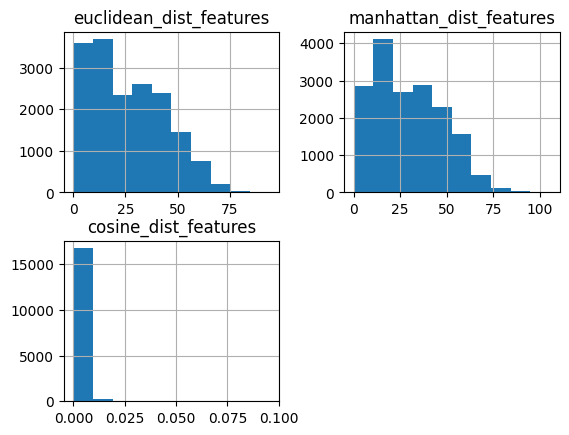

In [20]:
rec_pool_df[dist_feature_cols].hist()

## 4. Build engine and generate recommendations

 - We will output recommended tracks based on the seed track using the following recommender engine builds

    - Build 1. Audio features only
    - Build 2. Audio features and with same predicted genre
    - Build 3. Predicted genre probabilities only
    - Build 4. Audio features and predicted genre probabilities

##### 4.1. Build 1 - Use audio features only
4.1.1. Euclidean distance

In [21]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('euclidean_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','euclidean_dist_features','predicted_genre']]

,track_id,track_name,artist_name,euclidean_dist_features,predicted_genre
3428,3daOwyqLApvUJCYQCjdRw8,Sana Dalawa Ang Puso Ko,RICO J PUNO,0.355800,pop
523,1NAo79LoI2KhBg3dPMXco3,You Are My Everything - From 'Descendants of t...,Julie Anne San Jose,0.376903,sad_opm
7089,2ZeJRaisaFv5MpXViiQilq,Wires,Athlete,0.436951,sad_opm
4993,6uU67m780vpFC4PGFOTXEn,It's Over Now,Kyla,0.472478,sad_opm
4250,6dKMtW4o2Bbl7n9qOmDX9o,'Di Ba't Pasko'y Pag-ibig,"['ABS-CBN Music All Star', 'Carol Banawa']",0.481349,sad_opm
4536,4VMkcaO6RaclmGFRW2hfww,Mahal Na Mahal Kita,Aegis,0.496189,sad_opm
11947,5hYKVNA29m8lOTLQOjKExN,Danser For Mig Selv,Medina,0.510595,pop
4997,1rYRd1d2LnYopazs9HyXWD,Let the Love Begin,"['Jerome John Hughes', 'Kyla']",0.548324,sad_opm
16305,46wDG6evLn2iPoQ0F8CUWk,My sea,IU,0.565537,sad_opm
224,2EqdBPn7IFykmJ3Eh7PlKw,Pilit,Hilera,0.570669,sad_opm


4.1.2. Manhattan distance

In [22]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('manhattan_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','manhattan_dist_features','predicted_genre']]

,track_id,track_name,artist_name,manhattan_dist_features,predicted_genre
523,1NAo79LoI2KhBg3dPMXco3,You Are My Everything - From 'Descendants of t...,Julie Anne San Jose,0.812003,sad_opm
3428,3daOwyqLApvUJCYQCjdRw8,Sana Dalawa Ang Puso Ko,RICO J PUNO,0.866402,pop
4250,6dKMtW4o2Bbl7n9qOmDX9o,'Di Ba't Pasko'y Pag-ibig,"['ABS-CBN Music All Star', 'Carol Banawa']",0.882900,sad_opm
7089,2ZeJRaisaFv5MpXViiQilq,Wires,Athlete,0.942152,sad_opm
4993,6uU67m780vpFC4PGFOTXEn,It's Over Now,Kyla,0.951298,sad_opm
4997,1rYRd1d2LnYopazs9HyXWD,Let the Love Begin,"['Jerome John Hughes', 'Kyla']",0.997400,sad_opm
4536,4VMkcaO6RaclmGFRW2hfww,Mahal Na Mahal Kita,Aegis,1.068100,sad_opm
11947,5hYKVNA29m8lOTLQOjKExN,Danser For Mig Selv,Medina,1.090911,pop
5371,4SwcSQIRh7M1dmzyYgCAHs,Half-Life,Duncan Sheik,1.159600,sad_opm
224,2EqdBPn7IFykmJ3Eh7PlKw,Pilit,Hilera,1.258482,sad_opm


4.1.3. Cosine distance

In [23]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_features','predicted_genre']]

,track_id,track_name,artist_name,cosine_dist_features,predicted_genre
10364,6ANHBjo3SuWuiFlC3yxa8P,Como Seria,Soraya,5.815811e-08,sad_opm
2088,5XPsSVX2R3enPamRURMq3W,ANXIOUS HEART,geiko,2.777656e-07,pop
14784,3gkwEytdCYIsrFdfEE2ALW,Mahika,TJ Monterde,6.070774e-07,sad_opm
9549,600HVBpzF1WfBdaRwbEvLz,"Let It Go - From ""Frozen""/Soundtrack Version",Idina Menzel,6.785183e-07,sad_opm
2179,0luyrm1L6gjtoLekHOf67t,Masyado Pang Maaga,Ben&Ben,6.797643e-07,sad_opm
10036,2GAhgAjOhEmItWLfgisyOn,Low,SZA,7.028132e-07,pop
1451,2Seb4aijY1t46OorUZdsGE,Sampaguita,"['juan karlos', 'Gloc-9']",7.678729e-07,pop
2833,5pp9zZxgRAKHX2IZcjolxQ,Wag Mong Aminin,Ebe Dancel,8.073189e-07,sad_opm
5205,3z5yZpGov3lsiFnHa4dR0f,Man on the Middle Cross,Rhett Walker,9.035289e-07,sad_opm
8276,5mjYQaktjmjcMKcUIcqz4s,Strangers,Kenya Grace,1.378758e-06,pop


##### 4.2. Build 2 - Audio features and with same predicted genre

In [24]:
recommendation_df = rec_pool_df[rec_pool_df['predicted_genre']==seed_track_data['predicted_genre']]\
                                    [rec_pool_df['track_id']!=seed_track_data['track_id']]\
                                    .sort_values('cosine_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_features','predicted_genre']]

<ipython-input-24-3a4dfb00342b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recommendation_df = rec_pool_df[rec_pool_df['predicted_genre']==seed_track_data['predicted_genre']]\


,track_id,track_name,artist_name,cosine_dist_features,predicted_genre
10364,6ANHBjo3SuWuiFlC3yxa8P,Como Seria,Soraya,5.815811e-08,sad_opm
14784,3gkwEytdCYIsrFdfEE2ALW,Mahika,TJ Monterde,6.070774e-07,sad_opm
9549,600HVBpzF1WfBdaRwbEvLz,"Let It Go - From ""Frozen""/Soundtrack Version",Idina Menzel,6.785183e-07,sad_opm
2179,0luyrm1L6gjtoLekHOf67t,Masyado Pang Maaga,Ben&Ben,6.797643e-07,sad_opm
2833,5pp9zZxgRAKHX2IZcjolxQ,Wag Mong Aminin,Ebe Dancel,8.073189e-07,sad_opm
5205,3z5yZpGov3lsiFnHa4dR0f,Man on the Middle Cross,Rhett Walker,9.035289e-07,sad_opm
3959,5nDSJO4909uNzMcZH3CggS,Hard to Say I'm Sorry - 2009 Remaster,Chicago,1.541070e-06,sad_opm
14395,4rOru0jbmXm21Lpe6bBP4r,I'll Be There,Julie Anne San Jose,1.598076e-06,sad_opm
430,6BxJLJw228OY5BFerPGl7z,Dahan,December Avenue,1.633774e-06,sad_opm
5189,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,1.681656e-06,sad_opm


##### 4.3. Build 3 - Predicted genre probabilities

In [25]:
rec_pool_df['all_distances_proba'] = rec_pool_df.apply(lambda x: get_distances(x[genre_proba_cols],\
                                                                           seed_track_data[genre_proba_cols]), axis=1)

In [26]:
dist_proba_cols = ['euclidean_dist_proba','manhattan_dist_proba', 'cosine_dist_proba']
rec_pool_df[dist_proba_cols] = rec_pool_df['all_distances_proba'].apply(pd.Series)
rec_pool_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,genre_pop_proba,genre_sad_opm_proba,all_distances_features,euclidean_dist_features,manhattan_dist_features,cosine_dist_features,all_distances_proba,euclidean_dist_proba,manhattan_dist_proba,cosine_dist_proba
0,3OpGUlDmRUXh0NkIYWoIlD,Your Song,2XHTklRsNMOOQT56Zm3WS4,Parokya Ni Edgar,0kV35wyXIJKk04VRG0DdF4,168493.0,2003,70,0.636,0.159,...,0.231372,0.612115,"[15.881662657291368, 22.250600000000002, 0.001...",15.881663,22.250600,0.001785,"[0.0649372143160802, 0.10477533936500552, 0.00...",0.064937,0.104775,0.004542
1,761frfZtZ8I2g70UsjFfBK,I Need You More Today,3XEHRbR9NMWfNzQ6TQMS9M,Caleb Santos,4TyVEjoScAou6qVjhXyYfp,233728.0,2016-12-02,63,0.474,0.522,...,0.220546,0.654385,"[22.978906659151583, 24.26549999999999, 4.1624...",22.978907,24.265500,0.000004,"[0.0992687358228354, 0.15108045935630796, 0.00...",0.099269,0.151080,0.008685
2,4r3wYgrJ3Q30ldSk05e6KP,Kiss (Never Let Me Go),0001ZVMPt41Vwzt1zsmuzp,Thyro & Yumi,0tSrGWDVpvBzlD8OWSRmg6,259714.0,2020-04-17,11,0.571,0.534,...,0.518463,0.274406,"[5.788866840755715, 7.433200000000003, 1.44188...",5.788867,7.433200,0.000014,"[0.3906811330726438, 0.608877494931221, 0.1844...",0.390681,0.608877,0.184443
3,3VcVQmMivq2ISfKUmIuvMK,Rainbow,6ZgBJRjJsK1iOJGKGZxEUv,South Border,6bMej3xtNOTiiHLdhR4wzX,347120.0,2005-01-01,63,0.660,0.224,...,0.136005,0.700668,"[46.744465721195326, 53.65460201999999, 0.0051...",46.744466,53.654602,0.005182,"[0.19324851307696322, 0.29551026225090027, 0.0...",0.193249,0.295510,0.033160
4,1FHCU1rDAeaPsBW9byjJ0Q,12:51,09DdQEMQaaq0f99vqqub3V,krissy & ericka,5M4GVkxOl3joHIkvNrAlbJ,246280.0,2011-01-01,61,0.503,0.357,...,0.123829,0.754091,"[3.298131290595096, 5.253099999999986, 0.00018...",3.298131,5.253100,0.000184,"[0.2377474977560784, 0.35049354285001755, 0.04...",0.237747,0.350494,0.042499


In [27]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_proba')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_proba','predicted_genre']]

,track_id,track_name,artist_name,cosine_dist_proba,predicted_genre
869,5O2qKvgBTsxB6tVzNmv8k5,Aking Bahaghari,Jeiven,0.000006,sad_opm
2630,4XYGjUYSAWuiBOGtK9vxxL,Dukha,Judas,0.000026,sad_opm
87,7bZHagEgtiwU0TtwWthsAq,My All,Mariah Jean,0.000036,sad_opm
14865,7FzhZ7C3NhM1UyqSHV9ytY,Burning,Sam Smith,0.000098,sad_opm
1981,5jx8tCxiO0uIbo2uNia23K,The One That Got Away - Acoustic,Katy Perry,0.000140,sad_opm
11998,6hfd87ZTyziYGNdA7HYMv9,Hope This Song Is For You (From the Netflix Fi...,Christopher,0.000146,sad_opm
16209,6C2JPPYodebs3deDBizyww,Kahit Kunwari Man Lang,Agsunta,0.000147,sad_opm
4406,6C2JPPYodebs3deDBizyww,Kahit Kunwari Man Lang,"['Agsunta', 'Moira Dela Torre']",0.000147,sad_opm
15754,3Z0oQ8r78OUaHvGPiDBR3W,Into the Unknown,Idina Menzel,0.000150,sad_opm
4706,0YY0v8s4qxtGH3Wrf0WS2H,Kaibigan Mo,"['Sarah Geronimo', 'Yeng Constantino']",0.000190,sad_opm


##### 4.4. Build 4 - Audio features and predicted genre probabilities

In [28]:
cols = feature_cols + genre_proba_cols
rec_pool_df['all_distances_all'] = rec_pool_df.apply(lambda x: get_distances(x[cols],\
                                                                           seed_track_data[cols]), axis=1)

In [29]:
dist_all_cols = ['euclidean_dist_all','manhattan_dist_all', 'cosine_dist_all']
rec_pool_df[dist_all_cols] = rec_pool_df['all_distances_all'].apply(pd.Series)
rec_pool_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,manhattan_dist_features,cosine_dist_features,all_distances_proba,euclidean_dist_proba,manhattan_dist_proba,cosine_dist_proba,all_distances_all,euclidean_dist_all,manhattan_dist_all,cosine_dist_all
0,3OpGUlDmRUXh0NkIYWoIlD,Your Song,2XHTklRsNMOOQT56Zm3WS4,Parokya Ni Edgar,0kV35wyXIJKk04VRG0DdF4,168493.0,2003,70,0.636,0.159,...,22.250600,0.001785,"[0.0649372143160802, 0.10477533936500552, 0.00...",0.064937,0.104775,0.004542,"[15.881795414933524, 22.355375339365008, 0.001...",15.881795,22.355375,0.001785
1,761frfZtZ8I2g70UsjFfBK,I Need You More Today,3XEHRbR9NMWfNzQ6TQMS9M,Caleb Santos,4TyVEjoScAou6qVjhXyYfp,233728.0,2016-12-02,63,0.474,0.522,...,24.265500,0.000004,"[0.0992687358228354, 0.15108045935630796, 0.00...",0.099269,0.151080,0.008685,"[22.979121078316183, 24.416580459356297, 4.451...",22.979121,24.416580,0.000004
2,4r3wYgrJ3Q30ldSk05e6KP,Kiss (Never Let Me Go),0001ZVMPt41Vwzt1zsmuzp,Thyro & Yumi,0tSrGWDVpvBzlD8OWSRmg6,259714.0,2020-04-17,11,0.571,0.534,...,7.433200,0.000014,"[0.3906811330726438, 0.608877494931221, 0.1844...",0.390681,0.608877,0.184443,"[5.802035078119906, 8.042077494931224, 1.85400...",5.802035,8.042077,0.000019
3,3VcVQmMivq2ISfKUmIuvMK,Rainbow,6ZgBJRjJsK1iOJGKGZxEUv,South Border,6bMej3xtNOTiiHLdhR4wzX,347120.0,2005-01-01,63,0.660,0.224,...,53.654602,0.005182,"[0.19324851307696322, 0.29551026225090027, 0.0...",0.193249,0.295510,0.033160,"[46.74486517841091, 53.95011228225089, 0.00518...",46.744865,53.950112,0.005189
4,1FHCU1rDAeaPsBW9byjJ0Q,12:51,09DdQEMQaaq0f99vqqub3V,krissy & ericka,5M4GVkxOl3joHIkvNrAlbJ,246280.0,2011-01-01,61,0.503,0.357,...,5.253100,0.000184,"[0.2377474977560784, 0.35049354285001755, 0.04...",0.237747,0.350494,0.042499,"[3.30668926309742, 5.603593542850003, 0.000185...",3.306689,5.603594,0.000186


In [30]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_all')[:10]
recommendation_df[['track_name','artist_name','cosine_dist_all','predicted_genre']]

,track_name,artist_name,cosine_dist_all,predicted_genre
10364,Como Seria,Soraya,5.703374e-07,sad_opm
14395,I'll Be There,Julie Anne San Jose,1.628409e-06,sad_opm
9549,"Let It Go - From ""Frozen""/Soundtrack Version",Idina Menzel,1.645740e-06,sad_opm
2833,Wag Mong Aminin,Ebe Dancel,1.721390e-06,sad_opm
5205,Man on the Middle Cross,Rhett Walker,1.808570e-06,sad_opm
14784,Mahika,TJ Monterde,1.913051e-06,sad_opm
2179,Masyado Pang Maaga,Ben&Ben,2.016012e-06,sad_opm
1175,If I Believe,Jinky Vidal,2.122718e-06,sad_opm
3959,Hard to Say I'm Sorry - 2009 Remaster,Chicago,2.373363e-06,sad_opm
14380,Makalimutin,Kamara,2.467010e-06,sad_opm


In [31]:
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_all')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_all','predicted_genre']]

,track_id,track_name,artist_name,cosine_dist_all,predicted_genre
10364,6ANHBjo3SuWuiFlC3yxa8P,Como Seria,Soraya,5.703374e-07,sad_opm
14395,4rOru0jbmXm21Lpe6bBP4r,I'll Be There,Julie Anne San Jose,1.628409e-06,sad_opm
9549,600HVBpzF1WfBdaRwbEvLz,"Let It Go - From ""Frozen""/Soundtrack Version",Idina Menzel,1.645740e-06,sad_opm
2833,5pp9zZxgRAKHX2IZcjolxQ,Wag Mong Aminin,Ebe Dancel,1.721390e-06,sad_opm
5205,3z5yZpGov3lsiFnHa4dR0f,Man on the Middle Cross,Rhett Walker,1.808570e-06,sad_opm
14784,3gkwEytdCYIsrFdfEE2ALW,Mahika,TJ Monterde,1.913051e-06,sad_opm
2179,0luyrm1L6gjtoLekHOf67t,Masyado Pang Maaga,Ben&Ben,2.016012e-06,sad_opm
1175,2wezl0A4xT6KSilIW9BBEw,If I Believe,Jinky Vidal,2.122718e-06,sad_opm
3959,5nDSJO4909uNzMcZH3CggS,Hard to Say I'm Sorry - 2009 Remaster,Chicago,2.373363e-06,sad_opm
14380,1qVhtSUkTALDiU2Zg6MgBW,Makalimutin,Kamara,2.467010e-06,sad_opm


## 5. Output recommendations
Pick an approach, get the track_id list, and plug in next notebook to deploy as a playlist in Spotify

In [32]:
recommendation_df['track_id'].values

array(['6ANHBjo3SuWuiFlC3yxa8P', '4rOru0jbmXm21Lpe6bBP4r',
       '600HVBpzF1WfBdaRwbEvLz', '5pp9zZxgRAKHX2IZcjolxQ',
       '3z5yZpGov3lsiFnHa4dR0f', '3gkwEytdCYIsrFdfEE2ALW',
       '0luyrm1L6gjtoLekHOf67t', '2wezl0A4xT6KSilIW9BBEw',
       '5nDSJO4909uNzMcZH3CggS', '1qVhtSUkTALDiU2Zg6MgBW'], dtype=object)